<a href="https://colab.research.google.com/github/juank2572/codigo-LSTM-MultivariadoJuan-Carlos-Anaya-/blob/main/PREPROCESAMIENTO_DATOS_UNIVARIADO_JUAN_ANAYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importar librerias
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#importar base de datos
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta completa del archivo en tu Google Drive
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/Precio_Bolsa_Nacional_($kwh)_2015 - 2024.xlsx'

# Leer el archivo en un DataFrame de Pandas
df = pd.read_excel(ruta_archivo)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imprimir las primeras 5 filas
print(df.head())

        Fecha      Hora 0      Hora 1      Hora 2      Hora 3      Hora 4  \
0  2015-01-01  184.210107  178.210107  178.210107  178.210107  178.210107   
1  2015-01-02  149.480854  113.981854   84.480854  113.981854  113.981854   
2  2015-01-03  198.869354  198.744354  198.869354  190.869354  190.869354   
3  2015-01-04  242.913838  242.913838  242.913838  242.913838  242.913838   
4  2015-01-05  189.260771  143.603771  143.603771  143.603771  143.603771   

       Hora 5      Hora 6      Hora 7      Hora 8  ...     Hora 14  \
0  178.210107  178.210107  111.699107  178.210107  ...  178.210107   
1  113.981854  113.981854  184.480854  184.480854  ...  214.480854   
2  190.869354  153.869354  190.869354  198.869354  ...  202.869354   
3  242.913838  122.913838  242.913838  242.913838  ...  242.913838   
4  144.483771  144.483771  193.099771  251.603771  ...  251.603771   

      Hora 15     Hora 16     Hora 17     Hora 18     Hora 19     Hora 20  \
0  178.210107  178.210107  178.210107  

In [ ]:
# Verificar si hay celdas vacías en todo el DataFrame
if df.isnull().values.any():
  print("Hay celdas vacías en el DataFrame")
else:
  print("No hay celdas vacías en el DataFrame")

No hay celdas vacías en el DataFrame


In [ ]:
#resumen estadístico de las columnas
df.describe()

,Hora 0,Hora 1,Hora 2,Hora 3,Hora 4,Hora 5,Hora 6,Hora 7,Hora 8,Hora 9,...,Hora 14,Hora 15,Hora 16,Hora 17,Hora 18,Hora 19,Hora 20,Hora 21,Hora 22,Hora 23
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,...,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,267.990392,261.513789,254.334295,250.159979,254.349361,266.659588,267.197252,277.054470,289.305755,296.619826,...,323.705100,323.811614,318.649194,314.605336,340.300859,350.226178,335.176655,318.933932,301.594754,284.887558
std,288.666898,273.968309,265.670412,258.859383,259.033869,268.300859,268.285910,269.708903,277.322803,280.446754,...,304.903406,307.791419,311.683472,317.640553,330.783019,328.831053,322.306101,313.049655,301.023687,285.336856
min,51.649498,51.649498,46.791501,51.116576,51.649498,51.116576,51.116576,51.116576,54.061498,60.312095,...,61.172757,61.172757,60.500510,54.061498,61.172757,61.172757,61.172757,60.312095,54.061498,54.061498
25%,99.947181,99.579583,96.818896,96.461103,99.654521,104.304174,105.246559,110.542731,117.938661,123.518932,...,136.781034,135.142402,130.638819,124.758927,139.898739,147.724065,138.139627,128.548617,118.335859,110.079352
50%,154.935293,153.052462,148.647327,146.851085,152.336140,160.841096,161.864385,172.235020,186.351318,193.620754,...,209.315000,208.896288,202.869677,198.465245,216.410066,227.856058,214.767609,202.620217,190.094000,174.596447
75%,304.765480,300.463124,292.465067,286.452249,290.053969,308.078147,307.999910,323.680629,343.067610,355.593827,...,391.596558,390.580757,382.384064,370.682500,403.642265,422.355334,398.289983,380.645710,360.328872,334.291889
max,2674.698932,2674.698932,2498.777619,2498.777619,2498.777619,2498.777619,2498.777619,2498.777619,2821.520551,2498.777619,...,2675.536787,2675.536787,2675.536787,2675.536787,2675.536787,2675.536787,2674.698932,2674.698932,2674.698932,2674.698932


In [ ]:
# Verificar si hay filas repetidas
print(f'Tamaño del DataFrame antes de eliminar filas repetidas: {df.shape}')

df.drop_duplicates(inplace=True)

print(f'Tamaño del DataFrame después de eliminar filas repetidas: {df.shape}')

Tamaño del DataFrame antes de eliminar filas repetidas: (3652, 25)
Tamaño del DataFrame después de eliminar filas repetidas: (3652, 25)


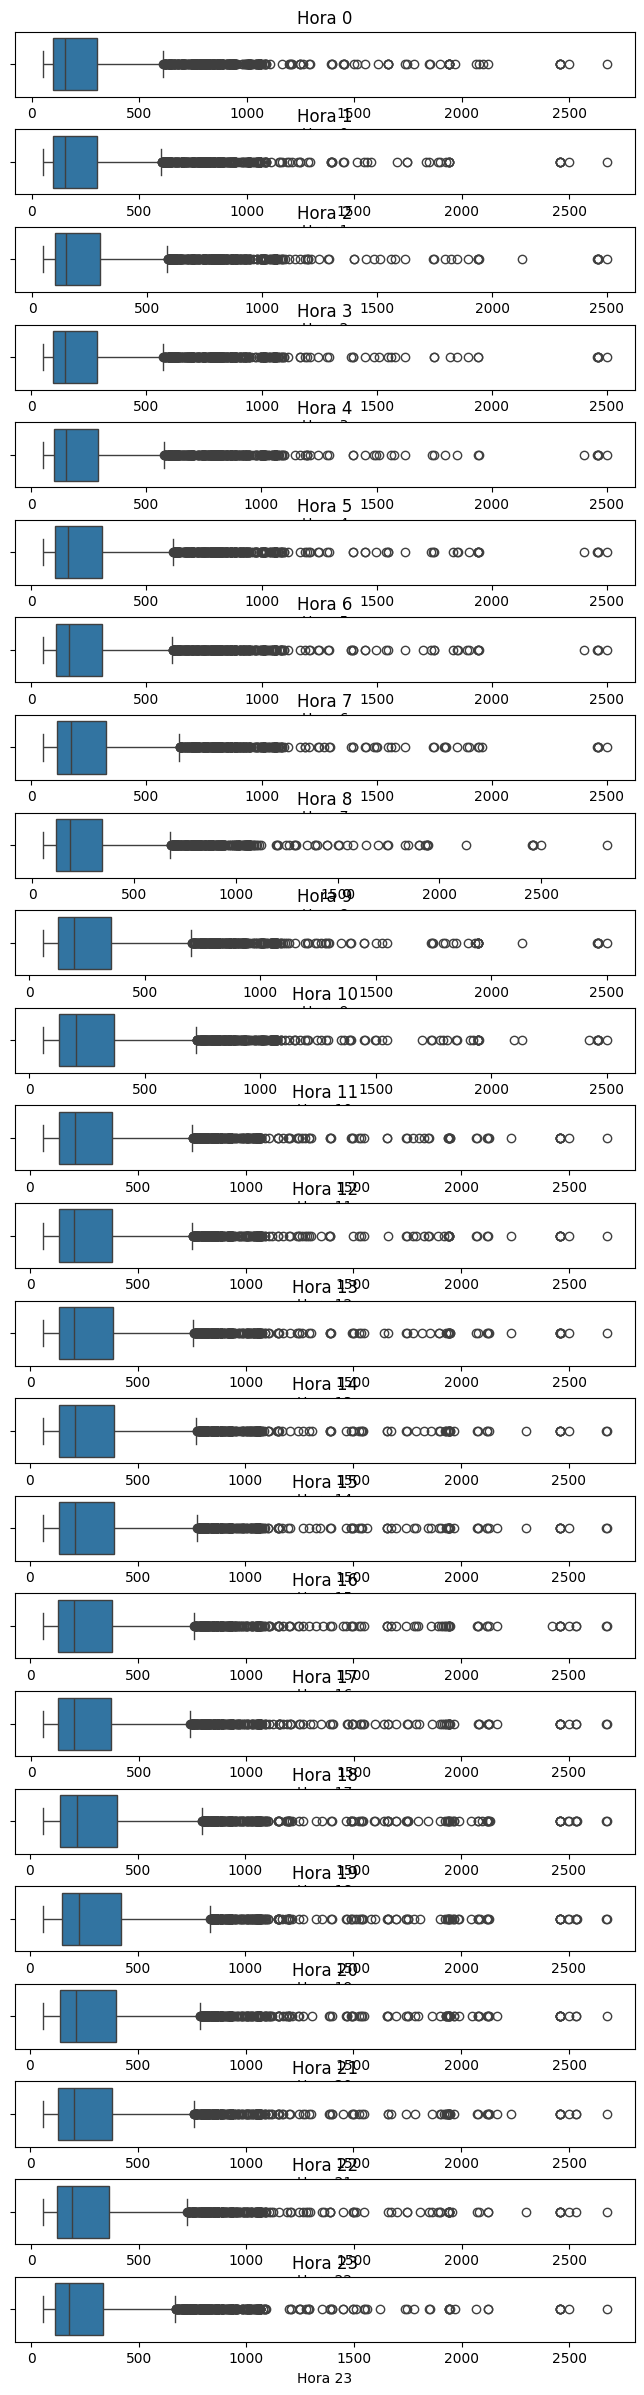

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt  # Asegúrate de que esta línea esté en la misma celda
import seaborn as sns

# Crear un boxplot para cada columna numérica
cols_num = ['Hora 0', 'Hora 1', 'Hora 2', 'Hora 3', 'Hora 4', 'Hora 5', 'Hora 6', 'Hora 7', 'Hora 8', 'Hora 9', 'Hora 10', 'Hora 11', 'Hora 12', 'Hora 13', 'Hora 14', 'Hora 15', 'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19', 'Hora 20', 'Hora 21', 'Hora 22', 'Hora 23']
fig, ax = plt.subplots(nrows=24, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
plt.show() # Agregar esta línea para mostrar las gráficas

# Guardar la figura en un archivo antes de mostrar
plt.savefig('boxplots.png')

# Ahora puedes mostrar los gráficos
plt.show()



In [ ]:
df.shape

(3652, 25)

In [ ]:
ruta_archivo = '/content/dataset_preciosenergia_clean.xlsx'
